In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import math
from textwrap import wrap
pd.set_option('display.precision', 2)
from IPython.display import display, HTML
display(HTML(data=""" <style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; } </style> """))

### Raw Data

In [3]:
df = pd.read_csv('Survey_data_3-29.csv')
colswant = []
for hoo in df.columns:
    poo = hoo.split(")")[1]
    boo = poo.split(":")[0]
    moo = boo.split("(")[0]
    foo = moo.strip()
    colswant.append(foo)
data = pd.read_csv('Survey_data_3-29.csv', names=colswant, header=0)
data.to_csv("Clean_Data.csv")
data

,Distance to Coastline,Distance to Municipal Drinking Water Wells,Distance to Private/Domestic Drinking Water Wells,Drinking Water Well Capture Zones,Soil/Geological Data,Average Annual Rainfall,Distance to Streams or Wetlands,Cesspool Density,Water Table Elevation,Risk of Impact from Sea Level-Rise,Coral Cover and Recovery Potential,Resource Fish Biomass and Recovery Potential,Coastline Visitation,Lifeguarded Swimming Beaches,Ocean Circulation and Residence Time Proxy
0,5,5,3,3,4,4,5,4,4,3,3,3,4,4,3
1,1,5,4,4,5,2,3,4,4,3,3,3,3,3,2
2,4,5,5,5,2,1,3,4,4,3,1,1,1,1,1
3,2,5,4,5,2,3,2,4,2,3,3,3,3,2,4
4,5,5,3,5,3,3,5,5,4,5,3,3,1,2,3
5,3,3,3,2,2,2,3,4,3,4,2,1,1,1,2
6,3,5,1,4,1,2,5,3,5,5,5,5,5,5,4
7,5,5,5,3,2,2,3,4,3,4,4,4,4,4,2
8,3,5,5,2,3,2,3,4,4,1,2,2,2,2,1
9,4,5,4,5,2,2,5,3,4,3,5,4,2,4,5


## Scoring Rubric 

- Weight of (1) Baseline: Factor is important, but not exceptionally
- Weight of (2) Double weight: Factor is more important than baseline
- Weight of (3) Triple weight: Factor is very important
- Weight of (4) Quadruple weight: Factor is one of the most important factors of all
- Weight of (5) Extremely important: reserved for the single or few factors that are the primary drivers of impact

## Histograms of Raw Data 

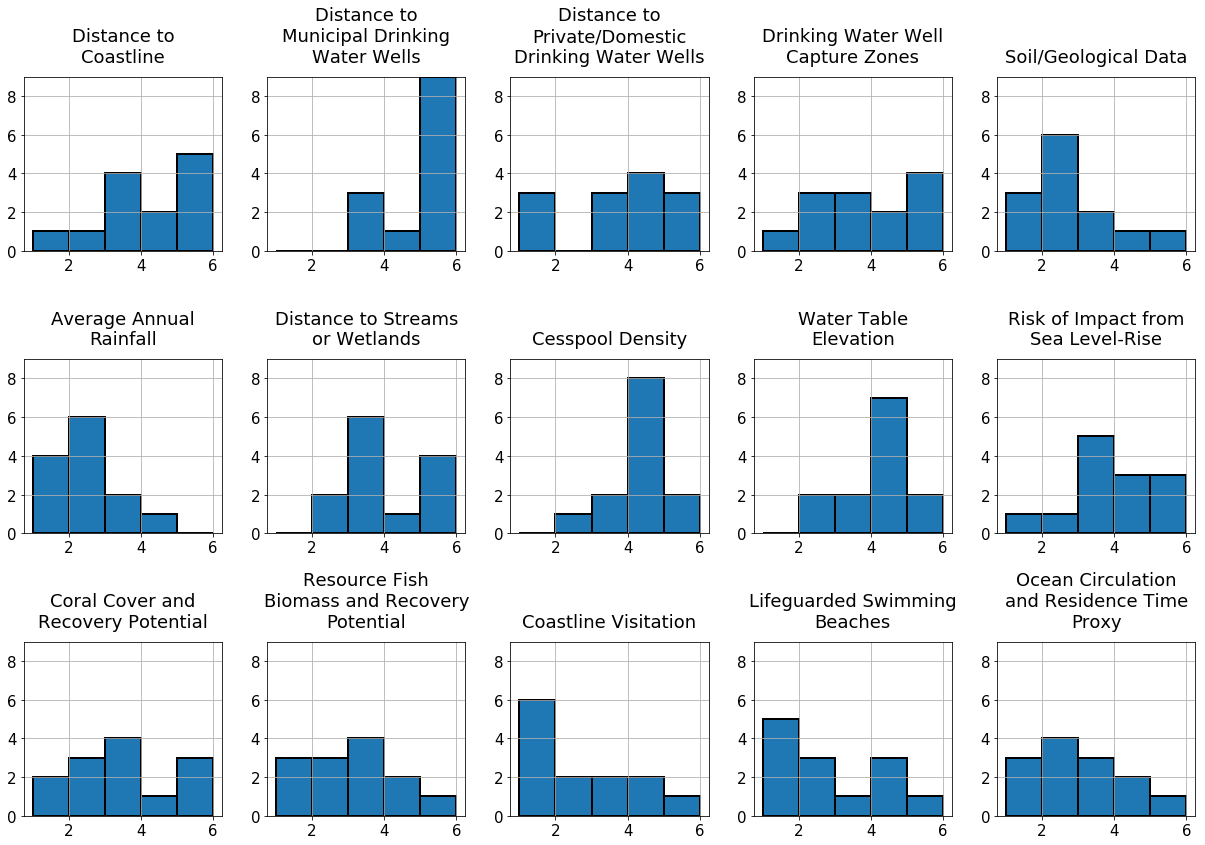

In [18]:
fig, ax = plt.subplots(3, 5, figsize=(17,12))
YY = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
plt.rcParams.update({'font.size': 15})
for i, var in enumerate(data):
    x = math.floor(i/5)
    y = YY[i]-1
    data[var].hist(ax=ax[x,y], edgecolor='k', bins=range(1,7), linewidth=2)
    title = ax[x,y].set_title("\n".join(wrap(var, 20)))
    fig.tight_layout()
    title.set_y(1.05)
    ax[x,y].set_ylim([0, 9])
    
plt.savefig('Histograms.png')

### Basic Statistics 

In [5]:
stats = data.describe().transpose()[['mean', "50%", "std" ]]
stats.to_csv("Clean_stats.csv")
stats

,mean,50%,std
Distance to Coastline,3.69,4.0,1.32
Distance to Municipal Drinking Water Wells,4.46,5.0,0.88
Distance to Private/Domestic Drinking Water Wells,3.31,4.0,1.49
Drinking Water Well Capture Zones,3.38,3.0,1.39
Soil/Geological Data,2.31,2.0,1.18
Average Annual Rainfall,2.00,2.0,0.91
Distance to Streams or Wetlands,3.54,3.0,1.13
Cesspool Density,3.85,4.0,0.80
Water Table Elevation,3.69,4.0,0.95
Risk of Impact from Sea Level-Rise,3.46,3.0,1.20


### Count the number of each score

In [6]:
stats['Num1s'] = np.nan; stats['Num2s'] = np.nan; stats['Num3s'] = np.nan; stats['Num4s'] = np.nan; stats['Num5s'] = np.nan
for col in data:
    data[col]
    numberof1s = len(data[data[col] == 1]);     numberof2s = len(data[data[col] == 2])
    numberof3s = len(data[data[col] == 3]);     numberof4s = len(data[data[col] == 4])
    numberof5s = len(data[data[col] == 5])
    stats['Num1s'][col] = numberof1s;  stats['Num2s'][col] = numberof2s;     stats['Num3s'][col] = numberof3s
    stats['Num4s'][col] = numberof4s;     stats['Num5s'][col] = numberof5s
stats

,mean,50%,std,Num1s,Num2s,Num3s,Num4s,Num5s
Distance to Coastline,3.69,4.0,1.32,1.0,1.0,4.0,2.0,5.0
Distance to Municipal Drinking Water Wells,4.46,5.0,0.88,0.0,0.0,3.0,1.0,9.0
Distance to Private/Domestic Drinking Water Wells,3.31,4.0,1.49,3.0,0.0,3.0,4.0,3.0
Drinking Water Well Capture Zones,3.38,3.0,1.39,1.0,3.0,3.0,2.0,4.0
Soil/Geological Data,2.31,2.0,1.18,3.0,6.0,2.0,1.0,1.0
Average Annual Rainfall,2.00,2.0,0.91,4.0,6.0,2.0,1.0,0.0
Distance to Streams or Wetlands,3.54,3.0,1.13,0.0,2.0,6.0,1.0,4.0
Cesspool Density,3.85,4.0,0.80,0.0,1.0,2.0,8.0,2.0
Water Table Elevation,3.69,4.0,0.95,0.0,2.0,2.0,7.0,2.0
Risk of Impact from Sea Level-Rise,3.46,3.0,1.20,1.0,1.0,5.0,3.0,3.0


### Create a custom metric that considers how many people thought each factor was 'highly' important

In [7]:
stats["Weighted_Weights"] = (stats["Num5s"]*3+stats["Num4s"]*2+stats["Num3s"]*1)/5
stats_big = stats.sort_values('Num5s', ascending=False)
stats_big.to_csv("Stats_big.csv")
stats_big

,mean,50%,std,Num1s,Num2s,Num3s,Num4s,Num5s,Weighted_Weights
Distance to Municipal Drinking Water Wells,4.46,5.0,0.88,0.0,0.0,3.0,1.0,9.0,6.4
Distance to Coastline,3.69,4.0,1.32,1.0,1.0,4.0,2.0,5.0,4.6
Drinking Water Well Capture Zones,3.38,3.0,1.39,1.0,3.0,3.0,2.0,4.0,3.8
Distance to Streams or Wetlands,3.54,3.0,1.13,0.0,2.0,6.0,1.0,4.0,4.0
Distance to Private/Domestic Drinking Water Wells,3.31,4.0,1.49,3.0,0.0,3.0,4.0,3.0,4.0
Risk of Impact from Sea Level-Rise,3.46,3.0,1.20,1.0,1.0,5.0,3.0,3.0,4.0
Coral Cover and Recovery Potential,3.00,3.0,1.41,2.0,3.0,4.0,1.0,3.0,3.0
Cesspool Density,3.85,4.0,0.80,0.0,1.0,2.0,8.0,2.0,4.8
Water Table Elevation,3.69,4.0,0.95,0.0,2.0,2.0,7.0,2.0,4.4
Soil/Geological Data,2.31,2.0,1.18,3.0,6.0,2.0,1.0,1.0,1.4


### Final Weights  -  Median Value is probably best 

In [257]:
stats[['mean', '50%','Weighted_Weights']].sort_values('50%', ascending=False)

,mean,50%,Weighted_Weights
Distance to Municipal Drinking Water Wells,4.46,5.0,6.4
Distance to Coastline,3.69,4.0,4.6
Distance to Private/Domestic Drinking Water Wells,3.31,4.0,4.0
Cesspool Density,3.85,4.0,4.8
Water Table Elevation,3.69,4.0,4.4
Drinking Water Well Capture Zones,3.38,3.0,3.8
Distance to Streams or Wetlands,3.54,3.0,4.0
Risk of Impact from Sea Level-Rise,3.46,3.0,4.0
Coral Cover and Recovery Potential,3.00,3.0,3.0
Resource Fish Biomass and Recovery Potential,2.62,3.0,2.2


### Display all text explanations as to why each responded weighted factors as they did

In [13]:
pd.set_option('display.max_colwidth', 0)
responses = pd.read_csv('Survey_Text_Responses.csv')

In [29]:
responses.iloc[:, [1]]

,(Q1.2) Please provide a short explanation of why you weighted Distance to Coastline as you did above.
0,"Work completed on Hawai'i Island has shown that cesspool contents have traveled nearly 100 m through groundwater in less than a day. Coastal areas will also be first impacted by SLR and the effects that follow, like decreased distance to water table and even tidal influence in extreme cases."
1,NaN
2,Potential public health impacts
3,"Distance measured is based on a 2-D metric (flat earth scenario). Does not fully address the topographic changes in elevation (mountains, valleys, etc.). Would feel this was more important if the distance was based on overland hydrology model with time of concentration (Tc)"
4,"Isotope chemistry and modeling shows that sewage injectate in South Maui doubled nitrogen load in groundwater discharge to shore, impacting algae blooms. OSDS cumulative effluent can compare to wastewater plant volume. There are no treatment options once effluent reaches coastal waters."
5,Because it is a proxy for the travel distance from the cesspool to the shoreline.
6,opportunity to be naturally filtered before reaching nearshore
7,"Fecal bacteria, some of which are pathogens such as Staph will flow to the shore"
8,"Based on the overall scale I used, I see it as more important than other environmental health/impact-related parameters."
9,If the resource to be remediated/protected is coastal then this ranks high.


In [30]:
responses.iloc[:, [2]]

,(Q2.2) Please provide a short explanation of why you weighted Distance to Municipal Drinking Water Wells as you did above.
0,"As we have seen in the recent events in O'ahu, contamination of a municipal drinking water well can have very widespread effects on health."
1,"Risk=Consequence of contamination x Likelihood of contamination. When both are high, the risk is highest. The 10 year capture zone is chemical travel time and most domestic OSDS risk is micro, so the 2 year capture zone micro travel time is most significant with the highest risk. All municipal wells are chlorinated which decreases risk."
2,Drinking water needs to be protected as the highest priority
3,Drinking water is the most basic human need for our existence.
4,Cumulative impact of nitrate to drinking water. Distance must be a site specific criteria but generally decrease in proximity increase risk to well.
5,Because it is a proxy for the distance from a cesspool to the wells.
6,opportunity to be naturally filtered; potential contamination of dw supplies (although we treat/chlorinate so risk of pathogens is low)
7,Virus pathogens in some sewage. They have a very low MID.
8,"Contamination of drinking water is of the highest concern, is this water treated? If no, I would give this question 5 and to Q3 4 points."
9,Clearly we don't want pure wastewater from entering drinking water wells. Is there a way to characterize this a travel time to drinking wells. Public health first.


In [31]:
responses.iloc[:, [3]]

,(Q3.2) Please provide a short explanation of why you weighted Distance to Private/Domestic Drinking Water Wells as you did above.
0,"Not as important as municipal wells since they serve a smaller portion of the population, but still an issue because testing may be less regular. Private well owners may also be more inclined to avoid contamination from cesspools on their own property."
1,"Small domestic wells are a little less important than municipal wells because of scale. Maybe the category should be Public Water System Wells (municipal, military, private), which by rule Title 11-20 HAR, serves more than 25 people provides the necessary scale."
2,Drinking water needs to be protected as the highest priority
3,"Very important for the individual consumers of that well. However, the number of consumers is less than a municipal well."
4,"Risk to drinking water quality is the same as municipal well, but private wells apply risk evaluation and well siting criteria to a lesser extent. Assuming the risk and extra cost of treatment for contaminants including nitrate"
5,Because it is a proxy for the distance from a cesspool to the wells.
6,private wells can pay for wellhead treatment and thus bear the cost of privatizing water. Many of these wells post-date the OSDS. Unfair to burden homeowners. (I?m being intentionally provocative here.)
7,same
8,Contamination of drinking water is of the highest concern. It could be argued that the municipal drinking water is treated before distribution.
9,It would be best to focus on areas that a have a high density of onsite wells and onsite septics. Again public health first.


In [32]:
responses.iloc[:, [4]]

,(Q4.2) Please provide a short explanation of why you weighted Drinking Water Well Capture Zones as you did above.
0,"I agree with differentiating the travel times and giving the shorter period a higher priority. Less important than direct contamination of wells and the chance of some biological filtration through travel, but still important due to likely contamination of a drinking water source."
1,"4 because Zone C 10 year is not a significant contaminant to drinking water wells if the OSDS is domestic, primarily microbiological, household cleaners and soaps are less by volume. Soil absorption, filtration and aquifer dilution, increases with distance. Prioritizing the 2 year travel time should be sufficient."
2,Drinking water needs to be protected as the highest priority
3,This would address the justification from a public relations standpoint. When someone asks why is my home a priority and not the person 4 blocks down the street?
4,"Until SWAP model using MODFLOW/MODPATH is refined, 2 year time of travel accounts for microbial survival time and is a basis for current wellhead protection measures including cesspool upgrades"
5,This is important because this is the catchment area that all the cesspools drain into (but not all are necessarily in close proximity to the waterbody of concern).
6,2 years enough time to filter
7,"pathogens will die off most likely, Nitrates will persist"
8,Are these modeling data reliable?
9,How does this overlap with the two above? This looks more accurate a layer than #2


In [33]:
responses.iloc[:, [5]]

,(Q5.2) Please provide a short explanation of why you weighted Soil/Geological Data as you did above.
0,Important factor for assuming biological filtration rate and applicability of septic systems in these areas.
1,Very pertinent criteria. Not every island has a hydrologic confining caprock layer of marine and terrestrial sediments like Oahu that because of age has experienced cycles of sea level rises and falls.
2,"This is important for absorption beds, but not as much for cesspools. Cesspools generally release water below the soil layer"
3,I feel this is important. Don't know enough of the technical aspects how these modeled results would translate to real world results.
4,NaN
5,"This can affect sewage travel time to the waterbody, but I think proximity is a more important factor."
6,"I don?t trust the soil type maps enough to rank them high, but I could be convinced they are useful despite shortcomings"
7,Permeability is not uniform or predictable
8,"Adsorption of chemicals and microbes varies depending on the soil's properties. Again , drinking water contamination is of highest concern."
9,while soils are important metric for treatment they may be confusing in a setting of prioritization setting.


In [34]:
responses.iloc[:, [6]]

,(Q6.2) Please provide a short explanation of why you weighted Average Annual Rainfall as you did above.
0,"We have seen low sewage indicator levels at areas in Hilo where cesspool contamination was confirmed through a dye tracer test. Rainfall dilution seems to be one of the main reasons for this, but I can't speak to this effect in other parts of Hawai?i."
1,"Dilution increases with saturation, but so does mobility."
2,I don't see this as very important in choosing which cesspools to replace first or those that are more critical
3,Rainfall does have an effect on the performance of these subsurface soil systems both from a treatment standpoint and a hydraulic one (ability to drain).
4,Intensity of rainfall is more important than average annual
5,"It is important, but even in dry areas, travel time of sewage from cesspools to shoreline can be hours to days. So, not as important as proximity to cesspools."
6,I?m not sure I agree with the dilution point - high rainfall also implies more and faster transport of the pollution to the streams/coast (less residency time)
7,When virus are shed in the trillions dilution does not matter
8,"The effect varies, can dilute?"
9,If this layer is to be used it needs to be made clear as to why? do higher rainfall rates dilute wastewater in soils? hydraulically pump water through he system faster? or are they typically associated with higher septic failure rates. Purpose and clarity are important.


In [35]:
responses.iloc[:, [7]]

,(Q7.2) Please provide a short explanation of why you weighted Distance to Streams or Wetlands as you did above.
0,Rivers and streams that have upper reaches located in urbanized areas with many cesspools have had higher sewage indicator levels compared to other stations. It seems that this is a relatively fast vector for sewage contamination at the shoreline.
1,"Not just microbiological, but nutrients are a significant issue."
2,"Important, but not as much as drinking water/public health"
3,"Similar to explanation for Q1. Unless they were divided into watersheds, the distance analysis tool may be inadvertently giving a risk score that is not representative real world risk. Good intent but may have unintended consequences. Unless I'm not fully understanding the geoprocessing tool."
4,"Short distance/minimal filtration put streams at risk, and provides an indirect pathway to nearshore waters. If the stream water is a source for drinking water, additional effluent treatment is costly."
5,Because it is a proxy for the distance from a cesspool to the stream/wetland.
6,"conduit to surface water where human contact could occur, or eutrophication causing ecological damage to critical stream ecosystems"
7,Streams drain to the sea
8,NaN
9,How will this differ from distance to coast? can they be merged? Do they have different impacts?


In [36]:
responses.iloc[:, [8]]

,(Q8.2) Please provide a short explanation of why you weighted Cesspool Density as you did above.
0,"It is clear to see that a higher cesspool density would contribute greater amounts of sewage to the surrounding environment, leading to hotspots and increased contamination. Other environmental factors would also need to be accounted for to assess the possibility of contamination (ex: water table elevation, distance to wetlands, wells and coastlines, etc...) and eliminate hotspots in these areas."
1,"The greater the cesspool density, the more reason for a WWTP."
2,It is clearly more important to focus on high density areas prior to lone cesspools far away from everything. Higher density means higher potential impacts of all sorts. Also areas of high density have more potential replacement options
3,Cumulative impacts seems to be more greater in these dense areas.
4,"Cumulative effluent volume is a significant factor. Targeting density is more cost effective approach for selective cesspool upgrades, including investment in new decentralized sewer infrastructure."
5,"This is a top factor, but must be density relative to proximity to waterbody of concern."
6,"Higher loads, could lead to thresholds, but needs to be balanced with risk to drinking water/coasts"
7,The mass balance can be huge and far greater than a gang cesspool
8,I hope the cesspool data are reliable.
9,This may become more important for implementation scenario building rather than prioritization. For instance high density cesspools might be areas to focus on for sewer expansion or cluster systems.


In [37]:
responses.iloc[:, [9]]

,(Q9.2) Please provide a short explanation of why you weighted Water Table Elevation as you did above.
0,Shorter distances to the water table would likely translate to faster contamination of groundwater. This can also be assessed with soil suitability in case there are geologic features that would prevent or slow leaching of cesspool contents.
1,"The deeper the unsaturated zone, the more filtration."
2,"Very important, for example direct discharge into GW is immediate transport and risk to surface water and nearshore water. Larger travel distances provide some amount of dilution and degradation reducing risk"
3,Similar reasoning for the soil classification tool. I would weight the score higher if these theoretical depths were verified in the field.
4,Increased filtration and dispersion
5,"This is important especially in coastal areas, but not as important in more upland regions."
6,no filtration if gw high; will contaminate
7,Ground water can be a direct conduit to the sea
8,impact to drinking water
9,This would indicate areas most likely to hydraulically fail. I think this is important but may be more important in scenario planning.


In [38]:
responses.iloc[:, [10]]

,(Q10.2) Please provide a short explanation of why you weighted Risk of Impact from Sea Level-Rise as you did above.
0,"This is extremely important, but I am hesitant to rely on SLR predictions due the associated uncertainty in severity and time. I would likely rate this higher if there was more information on the confidence of these predictions."
1,important but the time element is extended over 50 - 80+ years
2,Basically the same as water table elevation and distance to coast; seems redundant
3,"This could be a cache 22. With erosion consuming certain coastal areas, it may not make sense to spend money in upgrading certain areas near the shorelines only to have it be devoured by the ocean. Not a wise investment for certain coastal area."
4,Assuming inundation and failure of cesspools along shoreline
5,This is important because it shows us which cesspools will be inundated and completely draining into the groundwater + ocean water. Highest priority should be given to those that are already inundated or will be the early ones to be inundated.
6,OSDS will collapse and release pollution to marine environment
7,We already have cesspits in tidal waters at PUAKO
8,"just I do not see this as important as human health, I do understand that it affects the functioning of cesspools (do they function anyway?) but most of the drinking water is typically not sourced from coastal areas. salt water intrusion is a problem, but we usually abandon salty wells, right?"
9,This metric and #9 should be fused in some way.


In [39]:
responses.iloc[:, [11]]

,(Q11.2) Please provide a short explanation of why you weighted Coral Cover and Recovery Potential as you did above.
0,"I agree on prioritizing areas with more coral cover and recovery potential, but I chose to give it a lower weight due to the fact that there may be some other factors affecting the survival and recovery of corals. Is it known that these areas are being impacted by sewage pollution or are they able to be given a higher score, because they aren't currently being impacted as much as other areas due to things like ocean circulation and residence time?"
1,"If combined with cesspool density, it could have greater impacts."
2,Baseline. Several factors capture the issue of nearshore water quality
3,Don't know enough this subject matter to make an informed decision.
4,Not my expertise
5,"I think human health is more important than coral, but we should prioritize to remove cesspools in areas that the state has identified as important with regards to coral reef conservation (the priority locations)."
6,Reefs are a critical resource
7,Nitrate synergize with temperature to effect coral declines
8,just I do not see this as important as human health
9,"As for resources both this question and the below. There should be a combined metric of ""protection and prevention of future harm"" ""documentation of a wastewater derived problem"" and ""susceptible to wastewater impacts"""


In [40]:
responses.iloc[:, [12]]

,(Q12.2) Please provide a short explanation of why you weighted Resource Fish Biomass and Recovery Potential as you did above.
0,"Definitely an important aspect to consider due to the role they play in sustenance and the economy, but this parameter could also be impacted by factors other than sewage."
1,not sure about the dilution aspect in nearshore water.
2,\nBaseline. Several factors capture the issue of nearshore water quality
3,Don't know enough this subject matter to make an informed decision.
4,Not my expertise
5,I would need to see the direct impacts of sewage to fisheries to weight this factor. It is not as a direct impact as the one to coral.
6,"Fish are important for food and recreation, and for health of coral reef"
7,Fisheries are already at risk and the Kona waters are known breeding areas
8,just I do not see this as important as human health
9,"same logic as above. Potential for categories such as human health impacts, fisheries impacts coastal resilience impacts (coral and mangrove fit in both)."


In [41]:
responses.iloc[:, [13]]

,(Q13.2) Please provide a short explanation of why you weighted Coastline Visitation as you did above.
0,More people visiting an area could increase exposure to the sewage from cesspools so it should be weighted heavily. This also accounts for the indirect use value of a place that could be reduced if that area were degraded by sewage pollution.
1,NaN
2,"Baseline: The issue is human health, but cesspool impacts to this are perceived by me as minor. Compared to drinking water impacts this is minor. We need safe beaches, but I believe they are safe now. Greater numbers of people visiting a beach does not seem like a major prioritization factor - popular beaches with one cesspool in the adjacent watershed should not receive priority over high density, GW, etc."
3,Don't know enough this subject matter to make an informed decision.
4,Ecological impact is more important
5,Visitors don't know about the sewage problem. I would make it areas that locals and tourist regularly visit for recreation.
6,"Ultimately, what we worry about is people getting sick! However, we should use something better than the Flickr-based model if we can."
7,Visitors getting GI and skin infections is already and issue and must be contained
8,contaminated drinking water is the major concern
9,all waters typically get used.


In [42]:
responses.iloc[:, [14]]

,(Q14.2) Please provide a short explanation of why you weighted Lifeguarded Swimming Beaches as you did above.
0,"This is a good proxy for some high-risk activities like surfing and swimming, but it excludes other important water activities that could be considered high-risk for exposure. This could be given a higher weight, but many of the places where people would have a higher chance of contracting illness from sewage pollution, through activities like diving, would take place in areas that likely do not have a lifeguard station."
1,Interesting criteria. Greater exposure potential.
2,Doesn't seem relevant - similar to Q13
3,"Ideally it seems that most people would go to a lifeguarded beach. However, in reality that is not always the case. Some beaches with a lot of swimmers probably should be guarded by due to budget constraints are not always."
4,Ecological impact is more important than recreational
5,Life guard towers are not necessarily in all the places where people swim.
6,Can we get average beach visitation per tower?
7,same
8,contaminated drinking water is the major concern
9,this is important but could be lumped into human health impacts as mentioned in a previous comment


In [44]:
responses.iloc[:, [15]]

,(Q15.2) Please provide a short explanation of why you weighted Ocean Circulation and Residence Time as you did above.
0,"As mentioned in the report, this proxy is not perfect, and many other factors can influence the movement of sewage through coastal waters. It should not be weighted as heavily as other factors for this reason."
1,NaN
2,"Baseline: this could potentially lead to lower prioritization of cesspools located on the coast in an area where there is really good circulation/mixing/dilution, which doesn't seem like a good outcome."
3,It seems from a logical standpoint that more dilution would occur in areas with low residence time and better circulation.
4,Not my expertise
5,"I think this is important, but we still do not know a lot about this factor and how it interacts with dispersal of sewage on the shoreline and reefs."
6,if the ocean can remove the pollution from the nearshore it will help minimize the impact on coastal ecosystems and bathers.
7,"Solar UV is very effective at microbial kill, occurs in hours"
8,Are these modeling data reliable to be used?
9,wastewater loads the gun and residence time pulls the trigger.
